In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale the Data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label - encode data set 
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y=label_encoder.transform(y)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
# Print the original and encoded data
for label, original_class in zip(y_test_categorical,  y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: [0. 1. 0.]
------------
Original Class: FALSE POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: FALSE POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 1. 0.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 0. 1.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 0. 1.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 0. 1.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 1. 0.]
------------
Original Class: CONFIRMED
Encoded Label: [1. 0. 0.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 0. 1.]
------------
Original Class: CONFIRMED
Encoded Label: [0. 1. 0.]
------------
Original Class: FALSE POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: FALSE POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: FALSE POSITIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: CONFIRMED
Encoded Label: [1. 0. 0.]
------------


# Train the Model



In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.895/0.805
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.862/0.818
k: 9, Train/Test Score: 0.858/0.820
k: 11, Train/Test Score: 0.848/0.830
k: 13, Train/Test Score: 0.848/0.830
k: 15, Train/Test Score: 0.842/0.830
k: 17, Train/Test Score: 0.839/0.830
k: 19, Train/Test Score: 0.836/0.831


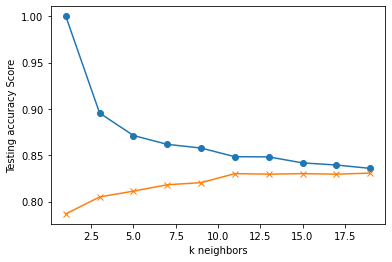

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, encoded_y_train)
    train_score = knn.score(X_train_scaled, encoded_y_train)
    test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 11 provides the best accuracy where the classifier starts to stablize
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, encoded_y_test))

k=9 Test Acc: 0.831


In [15]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names=["confirm","false positive","candidate"]))

                precision    recall  f1-score   support

       confirm       0.70      0.50      0.59       404
false positive       0.63      0.78      0.70       435
     candidate       0.99      1.00      0.99       909

      accuracy                           0.83      1748
     macro avg       0.77      0.76      0.76      1748
  weighted avg       0.83      0.83      0.83      1748



In [16]:
# Accuracy 
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(encoded_y_test, predictions))

Accuracy: 0.830091533180778


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15],
              'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [18]:
# Fit the model using the grid search estimator. 
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ..................algorithm=auto, n_neighbors=1; total time=   0.0s
[CV 2/5] END ..................algorithm=auto, n_neighbors=1; total time=   0.0s
[CV 3/5] END ..................algorithm=auto, n_neighbors=1; total time=   0.0s
[CV 4/5] END ..................algorithm=auto, n_neighbors=1; total time=   0.0s
[CV 5/5] END ..................algorithm=auto, n_neighbors=1; total time=   0.0s
[CV 1/5] END ..................algorithm=auto, n_neighbors=3; total time=   0.0s
[CV 2/5] END ..................algorithm=auto, n_neighbors=3; total time=   0.0s
[CV 3/5] END ..................algorithm=auto, n_neighbors=3; total time=   0.0s
[CV 4/5] END ..................algorithm=auto, n_neighbors=3; total time=   0.0s
[CV 5/5] END ..................algorithm=auto, n_neighbors=3; total time=   0.0s
[CV 1/5] END ..................algorithm=auto, n_neighbors=5; total time=   0.0s
[CV 2/5] END ..................algorithm=auto, 

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'n_neighbors': 7}
0.8147992635661735


In [20]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names=["confirm","false positive","candidate"]))
                            

                precision    recall  f1-score   support

       confirm       0.65      0.52      0.57       404
false positive       0.62      0.72      0.67       435
     candidate       0.99      1.00      0.99       909

      accuracy                           0.82      1748
     macro avg       0.75      0.75      0.74      1748
  weighted avg       0.82      0.82      0.82      1748



In [21]:
# Save the Model

In [22]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model/KNN.sav'
joblib.dump(grid, filename)

['model/KNN.sav']